# <p style="text-align: justify;"><div class="alert alert-info" role="alert">Principal Components Analysis coupled with K-Nearest Neighbors </div></p>

## `Ana González Guerra` 

### ` Student of the master in Data Science at the University of Cantabria` 

## Index<a class="anchor" id="index"></a>

* [Data loading](#1)
    * [Genetic predictors](#2)
    * [Physical predictors](#3)
    * [Target variables](#4)
    * [Creating the dataframe for the analysis](#5)
* [Principal Components Analysis (PCA)](#6)
    * [Train test partition : 85/15](#7)
    * [Principal components in train set](#8)
* [K-Nearest Neighbors (KNN)](#9)
    * [Training](#10)
    * [Test prediction](#11)

## Data loading <a class="anchor" id="1"></a>

### Genetic predictors <a class="anchor" id="2"></a>

* [Returning to the index of contents](#index)

<p style="text-align: justify;">With the intention of making easier the operations and the pooling between the classification for newer observations through the calculus of K-Nearest Neighbours classifier, the dataset use for genetic variables will be the one in which the genetic variables have their levels codified as 1,2,3 and the genetic variables with only one state or variance near zero has been deleted.</p>

In [64]:
handle_genetic <-  read.csv('handle_genetic_cod_28_04_20.csv')

head(handle_genetic)

rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,rs10497520,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
3,2,2,3,1,2,3,2,2,2,...,2,2,2,2,2,2,2,1,2,1
3,2,2,2,2,3,3,3,1,1,...,2,2,1,2,2,2,3,2,2,3
3,3,2,3,2,3,3,2,1,1,...,2,2,2,2,2,1,3,2,2,1
3,3,3,2,2,3,3,1,2,1,...,2,2,2,2,2,2,3,1,1,1
3,2,3,2,3,1,3,2,3,1,...,2,2,2,3,3,3,3,1,2,2
3,2,3,2,2,3,3,2,2,1,...,2,2,2,3,2,2,3,2,3,3


### Physical predictors <a class="anchor" id ="3"></a>

* [Returning to the index of contents](#index)

In [65]:
handle_physic <- read.csv('handle_physical_transformed_for_multiple_linear_regression.csv')
rownames(handle_physic) <- NULL    
head(handle_physic)
names(handle_physic)

W1Fc,W1Ox,W1Lac,W1tFc,W1tOx,W1tLac,W1tBorg,W1t5Fc,W1t5Ox,W1t5Lac,...,PlieguePec,PliegueAx,PliegueTri,PliegueSub,PliegueAbd,PliegueSup,tpcgrasa1,tpcgrasa2,PerCue,PerCin
0.09690101,-0.3612723,-0.2759823,-1.45702474,0.54870046,-1.5817296,-1.2280957,-3.38052307,-0.7215023,-2.7847814,...,-0.8757439,-0.8951047,1.0159821,-1.0183111,-1.2665456,-1.0811267,0.37659536,0.02830971,-2.2056212,-1.727334
-1.03822515,-0.6698591,1.5789808,-0.61695891,-1.07606258,0.2939295,-1.2280957,-2.55958657,0.2886009,-2.1390350,...,-1.0373448,-1.0624242,-0.8734794,-1.2829706,-1.3202312,-1.1361661,-0.43175736,0.03866565,-0.8281578,-1.462643
1.32283727,0.5644880,-1.0179676,-0.01024471,0.79866401,-1.1128148,0.8699011,0.01268113,0.2886009,-1.0493379,...,-1.1038863,-1.2619206,-1.1918942,-1.5390928,-1.4276024,-1.4113634,-0.86426995,0.23888577,-2.2056212,-1.674395
0.59635652,0.4101946,-0.3996465,-0.66362924,-1.82595321,0.2001465,-1.2280957,1.10726313,0.4329014,-0.7668239,...,-0.8472261,-0.6537784,0.3040546,-0.6255905,-0.6798385,-0.4595045,0.61849286,1.07832946,-0.9659042,-1.356766
-2.03713617,0.4101946,0.8369956,0.36311788,0.04877337,0.8566272,-0.1790973,-0.09677707,-1.0101032,-0.3228732,...,1.2440796,0.8038323,1.8540739,0.8855301,1.0917868,1.2013922,2.13407275,1.66913269,-1.5168895,-1.219127
-0.17552926,0.7187814,0.3423387,0.45645853,0.67368224,-0.3625512,0.8699011,-0.31569347,0.5772018,-0.9282605,...,-0.8092024,-0.8564925,0.4933012,-0.7963386,-1.1169928,-0.8577312,-0.07384767,0.33604799,-1.1036505,-1.303828


[1] "W1Fc"       "W1Ox"       "W1Lac"      "W1tFc"      "W1tOx"     
 [6] "W1tLac"     "W1tBorg"    "W1t5Fc"     "W1t5Ox"     "W1t5Lac"   
[11] "W2tFc"      "W2tOx"      "W2tLac"     "W2tBorg"    "W2t5Fc"    
[16] "W2t5Ox"     "W2t5Lac"    "W2t10Fc"    "W2t10Ox"    "W2t10Lac"  
[21] "Sumat"      "Peso"       "Edad"       "Altura"     "PlieguePec"
[26] "PliegueAx"  "PliegueTri" "PliegueSub" "PliegueAbd" "PliegueSup"
[31] "tpcgrasa1"  "tpcgrasa2"  "PerCue"     "PerCin"

<p style="text-align: justify;">In this notebook the target value will be W1.2MedDifWRelFFM1 and related variables will be deleted, that means, all variables that in its names contain the substring 'FM'.</p>

In [66]:
handle_physic <- handle_physic[!grepl('FM',names(handle_physic))] 
names(handle_physic)

[1] "W1Fc"       "W1Ox"       "W1Lac"      "W1tFc"      "W1tOx"     
 [6] "W1tLac"     "W1tBorg"    "W1t5Fc"     "W1t5Ox"     "W1t5Lac"   
[11] "W2tFc"      "W2tOx"      "W2tLac"     "W2tBorg"    "W2t5Fc"    
[16] "W2t5Ox"     "W2t5Lac"    "W2t10Fc"    "W2t10Ox"    "W2t10Lac"  
[21] "Sumat"      "Peso"       "Edad"       "Altura"     "PlieguePec"
[26] "PliegueAx"  "PliegueTri" "PliegueSub" "PliegueAbd" "PliegueSup"
[31] "tpcgrasa1"  "tpcgrasa2"  "PerCue"     "PerCin"

<p style="text-align: justify;">Having in account that Sumat did not show a significant difference in previous analysis and the other variables related to the fat folds, like thigh skinfold , seemed more important, in this case this variable will not be included.</p>

In [68]:
handle_physic <- handle_physic[!grepl('Sumat',names(handle_physic))] 
names(handle_physic)

[1] "W1Fc"       "W1Ox"       "W1Lac"      "W1tFc"      "W1tOx"     
 [6] "W1tLac"     "W1tBorg"    "W1t5Fc"     "W1t5Ox"     "W1t5Lac"   
[11] "W2tFc"      "W2tOx"      "W2tLac"     "W2tBorg"    "W2t5Fc"    
[16] "W2t5Ox"     "W2t5Lac"    "W2t10Fc"    "W2t10Ox"    "W2t10Lac"  
[21] "Peso"       "Edad"       "Altura"     "PlieguePec" "PliegueAx" 
[26] "PliegueTri" "PliegueSub" "PliegueAbd" "PliegueSup" "tpcgrasa1" 
[31] "tpcgrasa2"  "PerCue"     "PerCin"

### Target variables<a class="anchor" id="4"></a>


* [Returning to the index of contents](#index)

In [1]:
handle_target <- read.csv('handle_target_fusion_31_03_20.csv', row.name = 1)
rownames(handle_target)<- NULL
head(handle_target)

W1MaxWAbs,W1MaxWRel,W1maxRPM,W1MedWAbs,W1MedWRel,W1medRPM,W2MaxWAbs,W2MaxWRel,W2maxRPM,W2MedWAbs,...,W2DifWRelFFM1,W2DifWRelFFM2,W1.2MaxDifWAbs,W1.2MaxDifWRel,W1.2MaxDifWRelFFM1,W1.2MaxDifWRelFFM2,W1.2MedDifWAbs,W1.2MedDifWRel,W1.2MedDifWRelFFM1,W1.2MedDifWRelFFM2
398,8.747253,122,206,4.527473,100,397,8.725275,122,224,...,4.479981,4.544592,1,0.02197802,0.02589585,0.02626932,-18,-0.39560440,-0.46612522,-0.47284774
511,8.964912,128,294,5.157895,109,523,9.175439,122,295,...,4.552187,4.889881,-12,-0.21052632,-0.23958880,-0.25736216,-1,-0.01754386,-0.01996573,-0.02144685
524,10.174757,130,262,5.087379,107,476,9.242718,125,245,...,4.958966,5.566747,48,0.93203883,1.03043453,1.15672661,17,0.33009709,0.36494556,0.40967401
541,8.868852,128,351,5.754098,118,472,7.737705,130,333,...,2.792441,3.020719,69,1.13114754,1.38617564,1.49949379,18,0.29508197,0.36161104,0.39117229
547,9.596491,143,291,5.105263,116,169,2.964912,130,302,...,-3.215855,-3.248973,378,6.63157895,9.13979775,9.23392354,-11,-0.19298246,-0.26597295,-0.26871206
553,9.701754,133,365,6.403509,121,556,9.754386,136,355,...,4.113095,4.408965,-3,-0.05263158,-0.06138948,-0.06580544,10,0.17543860,0.20463161,0.21935148


### Creating the dataframe for the anaylisis <a class ="anchor" id ="5"></a>

* [Returning to the index of contents](#index)

In [103]:
summary(handle_target['W1.2MedDifWRelFFM1'])

 W1.2MedDifWRelFFM1
 Min.   :-0.4661   
 1st Qu.: 0.5708   
 Median : 1.0594   
 Mean   : 1.0901   
 3rd Qu.: 1.6031   
 Max.   : 3.0179   

In [70]:
ind_med <- cbind(handle_target['W1.2MedDifWRelFFM1'],handle_genetic, handle_physic)

In [71]:
#Making binary the target value

W1_W2MedWRelFFM1Bin <- factor(as.numeric(ind_med[1]>=median(ind_med[,1])))

In [72]:
ind_med <- cbind(W1_W2MedWRelFFM1Bin, ind_med)

In [73]:
#Deleting the old target variable

ind_med[2] <- NULL

In [74]:
head(ind_med)

W1_W2MedWRelFFM1Bin,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,...,PlieguePec,PliegueAx,PliegueTri,PliegueSub,PliegueAbd,PliegueSup,tpcgrasa1,tpcgrasa2,PerCue,PerCin
0,3,2,2,3,1,2,3,2,2,...,-0.8757439,-0.8951047,1.0159821,-1.0183111,-1.2665456,-1.0811267,0.37659536,0.02830971,-2.2056212,-1.727334
0,3,2,2,2,2,3,3,3,1,...,-1.0373448,-1.0624242,-0.8734794,-1.2829706,-1.3202312,-1.1361661,-0.43175736,0.03866565,-0.8281578,-1.462643
0,3,3,2,3,2,3,3,2,1,...,-1.1038863,-1.2619206,-1.1918942,-1.5390928,-1.4276024,-1.4113634,-0.86426995,0.23888577,-2.2056212,-1.674395
0,3,3,3,2,2,3,3,1,2,...,-0.8472261,-0.6537784,0.3040546,-0.6255905,-0.6798385,-0.4595045,0.61849286,1.07832946,-0.9659042,-1.356766
0,3,2,3,2,3,1,3,2,3,...,1.2440796,0.8038323,1.8540739,0.8855301,1.0917868,1.2013922,2.13407275,1.66913269,-1.5168895,-1.219127
0,3,2,3,2,2,3,3,2,2,...,-0.8092024,-0.8564925,0.4933012,-0.7963386,-1.1169928,-0.8577312,-0.07384767,0.33604799,-1.1036505,-1.303828


## Principal Components Analysis: PCA <a class="anchor" id="6"></a>

* [Returning to the index of contents](#index)

### Train test partition : 85/15<a class="anchor" id="7"></a>

In [75]:
library(caret)

set.seed(10)
id_df <- createDataPartition(ind_med$W1_W2MedWRelFFM1Bin,p = 0.85,list = FALSE)
ind_med_train <- ind_med[id_df,]
ind_med_test <- ind_med[-id_df,]

dim(ind_med_train)

dim(ind_med_test)

[1]  70 212

[1]  12 212

### Principal components in train set <a class ="anchor" id="8"></a>

* [Returning to the index of contents](#index)

In [76]:
pca_train<- prcomp(ind_med_train[, -1], scale = TRUE)
#target variable is not having in account during the building of principal components

In [77]:
str(pca_train)

List of 5
 $ sdev    : num [1:70] 3.35 3.02 2.71 2.65 2.6 ...
 $ rotation: num [1:211, 1:70] 0.0548 0.0202 0.0917 -0.058 -0.0691 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:211] "rs10034661" "rs10063949" "rs1024610" "rs1024611" ...
  .. ..$ : chr [1:70] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:211] 2.54 2.31 2.4 2.54 2.2 ...
  ..- attr(*, "names")= chr [1:211] "rs10034661" "rs10063949" "rs1024610" "rs1024611" ...
 $ scale   : Named num [1:211] 0.63 0.671 0.6 0.606 0.714 ...
  ..- attr(*, "names")= chr [1:211] "rs10034661" "rs10063949" "rs1024610" "rs1024611" ...
 $ x       : num [1:70, 1:70] 9.8 7.44 3.99 2.77 1.6 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:70] "1" "2" "3" "4" ...
  .. ..$ : chr [1:70] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


There is a maximum of 70 principal components

In [78]:
dim(pca_train$x)[1]

[1] 70

* Acumulated proportion of explained variance

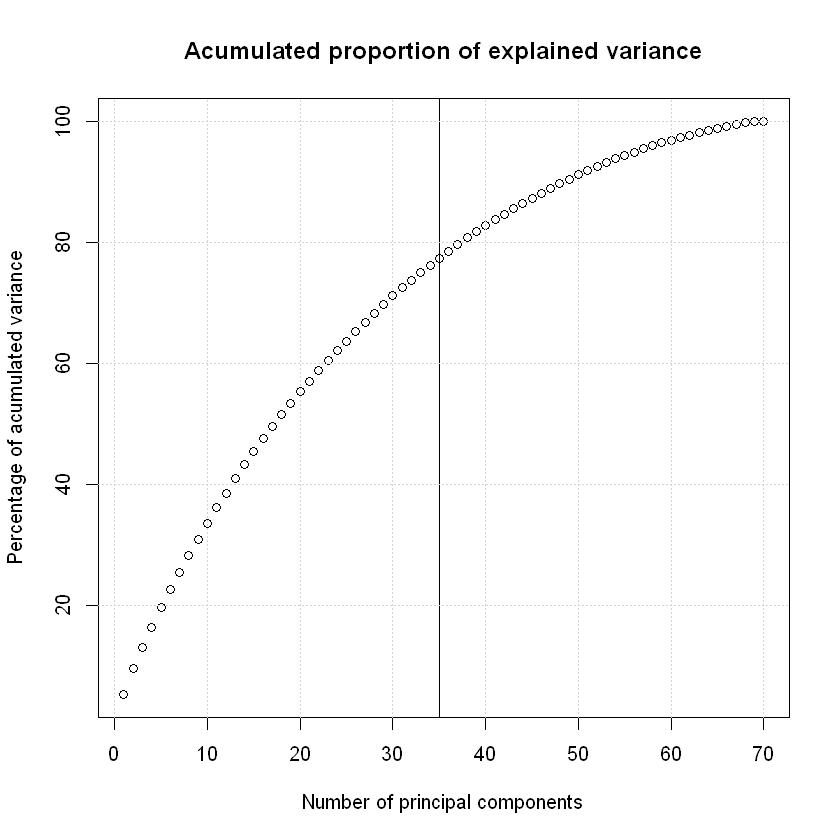

In [79]:
prop_variance <- cumsum(pca_train$sdev^2)/sum(pca_train$sdev^2)*100

plot(prop_variance,main="Acumulated proportion of explained variance",xlim=c(1,70),xlab = 'Number of principal components', ylab = 'Percentage of acumulated variance')
abline(v = which(pca_train$rotation[1,] == max(pca_train$rotation[1,])))
grid()

As it can be apreciated in the plot shown, the principal component to which target variable contribution is the biggest is:

In [80]:
pca_train$rotation[1,][which(pca_train$rotation[1,] == max(pca_train$rotation[1,]))]

PC35 
0.1650481

With an acumulated proportion of explained variance of:

In [81]:
prop_variance[35]

[1] 77.35653

Then, in order to have consistent results, the smallest number of principal components for the analysis will be 35.

<p style="text-align: justify;">Now, it is shown a plot ot the target variable influence in the set of principal components obtained in train with the objetive of checking if for a certain number of principal component makes or does not make sense to use in the model the target variable.</p>

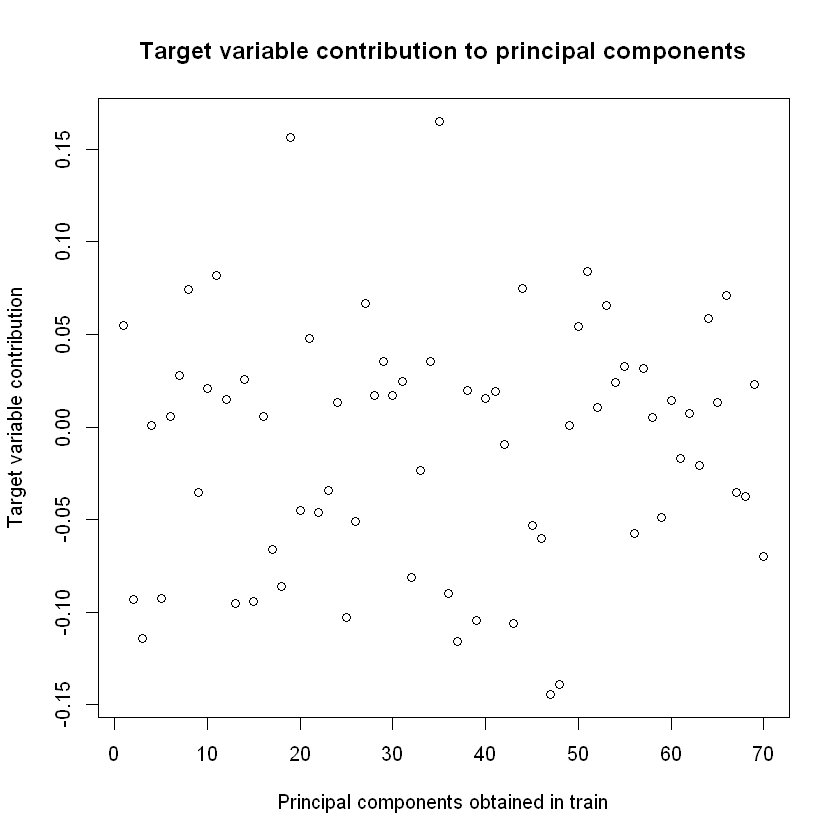

In [82]:
plot(pca_train$rotation[1,], main = 'Target variable contribution to principal components', 
     xlab = 'Principal components obtained in train', xlim = c(1,70),ylab = 'Target variable contribution')

The plot shows an uniform distribution of the target variable contribution, so it makes sense to keep the target variable for the model.

Now, in order to put in context the target variable contribution, we show down below an histogram of the original variables (included the target variable) contribution to the first principal component.

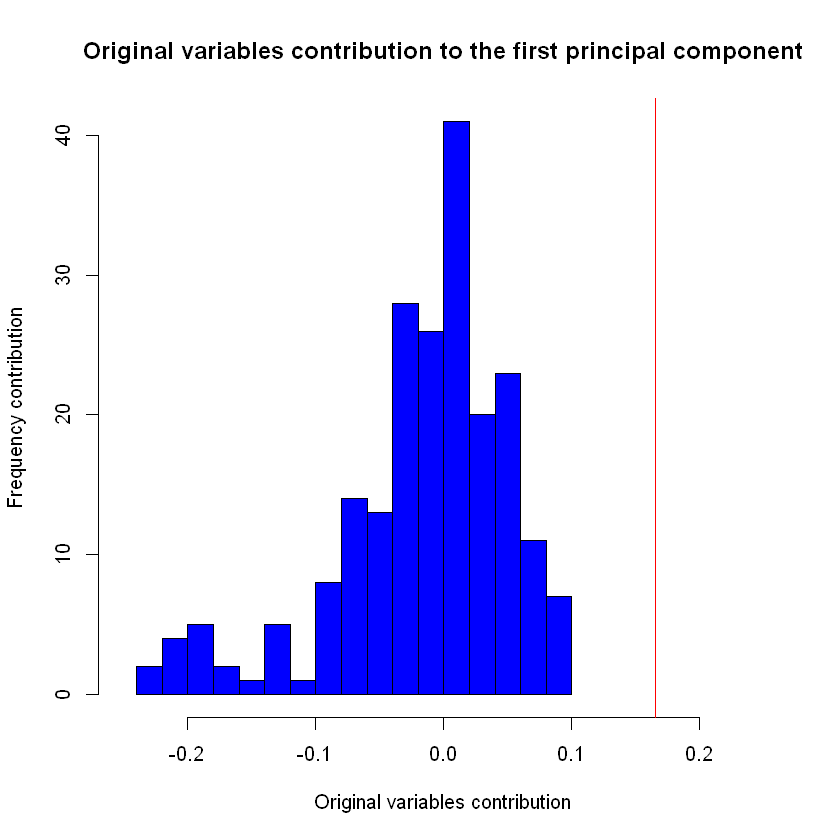

In [83]:
hist(pca_train$rotation[,1], breaks = 'FD',main = 'Original variables contribution to the first principal component', 
     xlab = 'Original variables contribution', ylab = 'Frequency contribution', col = 'blue', xlim=c(-0.25,0.25))
abline(v = max(pca_train$rotation[1,]), col = 'red')

In red, target variable contribution can be noted, it is far away from the rest of original variables contribution to  first principal component, being the highest apportation.

Different number of principal components will be studied, from the minimum of 35 PC (77,4% of explained variance), until a maximum number of components for which the level of explained variance is 95%.

In [84]:
thresholds_prop_variance <- c(which(prop_variance >= 77)[1], which(prop_variance >= 80)[1], which(prop_variance>= 85)[1], which(prop_variance >= 90)[1], which(prop_variance >= 95[1]))

Number of principal components studied.

In [85]:
thresholds_prop_variance

[1] 35 38 43 49 57 58 59 60 61 62 63 64 65 66 67 68 69 70

In [86]:
pca_train <- cbind(ind_med_train['W1_W2MedWRelFFM1Bin'],pca_train$x)

In [87]:
head(pca_train)

W1_W2MedWRelFFM1Bin,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70
0,9.803878,-6.491983,1.240417,-5.17451308,2.855829,-1.1427720,1.2305455,-2.6246150,0.7722514,...,0.5606699,-1.9463154,-0.29645889,-0.1554723,0.8982879,-0.22488532,-0.07232166,0.44017898,-0.2471261,-2.511880e-15
0,7.438964,1.191192,0.462978,1.98274920,-3.277300,-3.3777013,-7.0204798,5.2999012,-1.8056904,...,0.6352097,0.5450508,0.68352679,0.3689099,-0.3703127,-0.37447364,-0.09816029,0.35947577,0.3165508,-4.718448e-16
0,3.992403,-0.363151,-2.426133,-0.03949225,-4.426511,-0.6312258,0.9544492,-2.4189008,4.7140320,...,-0.3716252,-1.4913992,-0.83809639,-0.2810921,-0.9398880,0.04777468,-0.46041990,-0.02899951,0.7477801,-2.858824e-15
0,2.766404,2.128683,-5.474271,3.27253311,3.403339,1.6568849,2.1546298,0.9123194,0.7461983,...,0.6169426,0.2891146,-1.55278355,0.9580144,0.8644052,0.95258568,0.51307335,-0.39207444,-1.3821300,-4.746203e-15
0,1.600038,-1.969938,-2.683235,0.01004668,2.196908,-5.6808874,1.7777180,5.8584164,-0.3868966,...,-1.1714861,-0.1576358,-0.08340955,0.4035201,-0.8962280,-0.32752727,0.89174980,0.56943414,1.0264640,-1.817990e-15
0,4.297382,1.355464,-3.779475,4.52895575,-1.035419,1.9110381,-1.9499546,2.2444168,3.4631530,...,-1.9583969,0.3914073,0.62380869,-0.3301636,0.4286639,-0.56334470,-1.86561410,0.77488665,-0.5134788,-2.650657e-15


## K-Nearest Neighbors (KNN)<a class="anchor" id="9"></a>

* [Returning to the index of contents](#index)

### Training <a class="anchor" id ="10"></a>

In [88]:
set.seed(1)
trctrl = trainControl(method = "cv", number = 2) #crossvalidation with two folds
tuneGrid_ <- expand.grid(k = 1 : 30) # As maximum 30 neighbors will be tested
k<- c()# optimal number of k neighbors considered
acc <- c() #accuracy values associated with the optimal k for each case
for (i in thresholds_prop_variance){
    j <- i + 1 #columns selected of the original train dataframe
    df_train<- pca_train[, 1: j]
    knn.fit = train(W1_W2MedWRelFFM1Bin~ .,
                df_train,
                method = "knn",
                trControl = trctrl,
                preProcess = c("center", "scale"),
                tuneGrid = tuneGrid_)

  k<- c(k, knn.fit$bestTune)  
  acc <- c(acc, knn.fit$results[knn.fit$bestTune[[1]],]$Accuracy)
 

}

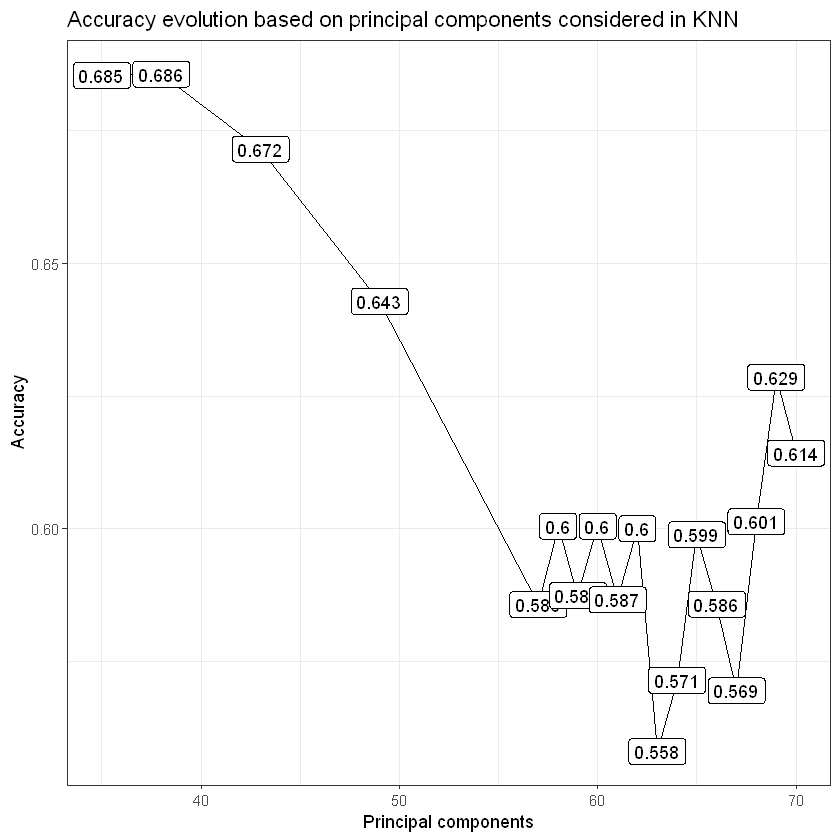

In [102]:
ggplot(data = data.frame(acc, pc = thresholds_prop_variance),
       aes(x = pc, y = acc, group = 1)) +
  geom_point() +
  geom_line() +
  labs(title='Accuracy evolution based on principal components considered in KNN')+
  geom_label(aes(label = round(acc,3))) +
  theme_bw() +
  labs(x = "Principal components", 
       y = "Accuracy")

As it can be appreciated in the plot, accuracy is stabilized to a value of 58%, we will choose the fifth number of principal components among the possibilities included in the vector thresholds_prop_variance:

In [90]:
print(paste('Number of principal components choosen:',thresholds_prop_variance[5]))
print(paste('Percentage of explained variance accumulated with', thresholds_prop_variance[5],'principal components:',prop_variance[57],'%'))

[1] "Number of principal components choosen: 57"
[1] "Percentage of explained variance accumulated with 57 principal components: 95.4474105731821 %"


In [91]:
print(paste('Number of optimal k neighbors in train:',k[5]))

[1] "Number of optimal k neighbors in train: 14"


### Test prediction <a class="anchor" id="11"></a>

* [Returning to the index of contents](#index)

In [92]:
library(class)

Projection of principal components obtained in train on test data:

In [93]:
pca_test_pred <- predict(prcomp(ind_med_train[, -1], scale = TRUE), newdata = ind_med_test[,-1] )
str(pca_test_pred)

 num [1:12, 1:70] 1.6146 1.2133 -0.2284 4.4004 -0.0139 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:12] "11" "16" "21" "25" ...
  ..$ : chr [1:70] "PC1" "PC2" "PC3" "PC4" ...


Prediction of responsable variable for test data using the knn classifier trained:

In [95]:
pred <- knn(train = pca_train[,2:57],test =pca_test_pred[,2:57], cl =pca_train$W1_W2MedWRelFFM1Bin ,k = 14)

In [96]:
pred

[1] 1 1 0 0 1 0 0 1 1 0 1 1
Levels: 0 1

In [97]:
ind_med_test$W1_W2MedWRelFFM1Bin

[1] 0 0 0 0 1 1 1 1 0 1 0 1
Levels: 0 1

Error in test prediction

In [98]:
acc.class = function(x,y){
    stopifnot(length(x) == length(y))
    return(sum(diag(table(x,y)))/length(x)* 100)
}


error <- 100 - acc.class(ind_med_test$W1_W2MedWRelFFM1Bin,pred)

print(paste(error,'% of predictions in test are wrong'))

[1] "58.3333333333333 % of predictions in test are wrong"


Matrix of confusion:

In [99]:
table(ind_med_test$W1_W2MedWRelFFM1Bin,pred)

   pred
    0 1
  0 2 4
  1 3 3

Accuracy in test prediction:

In [100]:
print(paste(acc.class(ind_med_test$W1_W2MedWRelFFM1Bin,pred),'% of predictions in test are correct'))

[1] "41.6666666666667 % of predictions in test are correct"
